# **Import required Libraries**

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import load_model

from tensorflow.keras.activations import relu
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler


%matplotlib inline

# 1 - Problem definition
It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9. The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

## Load the MNIST **dataset**
This dataset is already included in tensorflow

In [3]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 48s 4us/step


# 2 - Data Understanding

## Visualization
    - visualize a sample from dataset
    - define function to plot images
    - plot grid 0f 25 image

Train size 60000
Test size 10000
Train data is between 0 and 255


Text(0.5, 1.0, 'Label = 1')

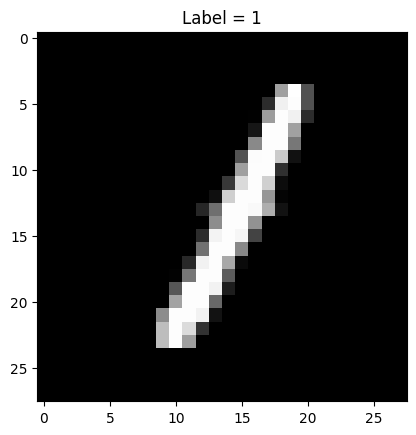

In [4]:
print("Train size "+str(x_train.shape[0]))
print("Test size "+str(x_test.shape[0]))

print("Train data is between {} and {}".format(np.min(x_train),np.max(x_train)))

image_size = x_train.shape[1:]

idx = 9837
plt.imshow(x_train[idx], cmap="gray")
plt.title("Label = "+ str(y_train[idx]))

# 3 - Data Preparation

In [5]:
# Normalize data
X_train = x_train / 255.0
X_test = x_test / 255.0

# One hot encoding
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
X_train.shape

(60000, 28, 28)

# 4 - Modeling

## 4-1 -Build the **Sequential** model
We want to make a neural network with 3 hidden layers

In [13]:
# Model
# Input layer : 784
# Layer 2: 100 activation = 'relu'
# layer 3: 200 activation = 'relu'
# layer 4: 10 activation = 'softmax'

model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100,activation = tf.keras.activations.elu, 
                    kernel_initializer = tf.keras.initializers.he_normal()))
model.add(Dropout(0.2))
model.add(Dense(
    200, 
    activation='relu', 
    kernel_regularizer= tf.keras.regularizers.L2(l2=1e-4)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 200)               20200     
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                2010      
                                                                 
Total params: 100,710
Trainable params: 100,710
Non-tr

In [14]:
model.load_weights("model_weights.h5")

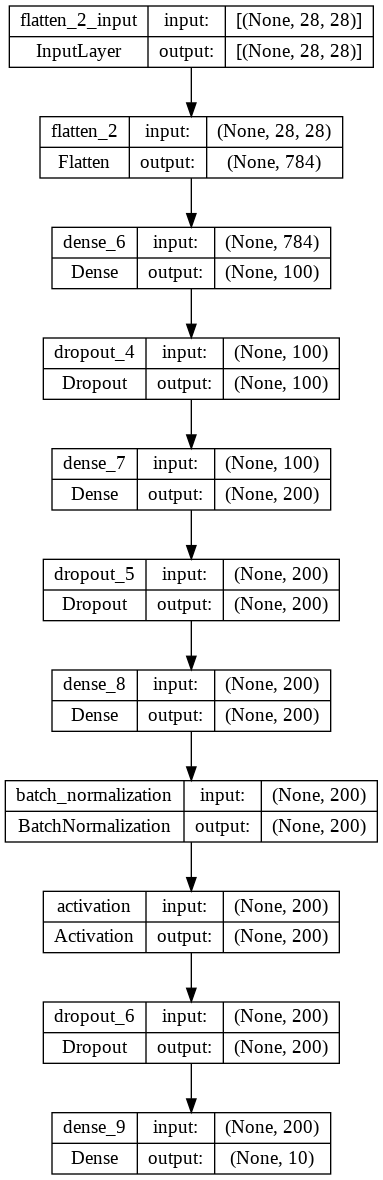

In [18]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [23]:
19%5

4

## 4-2- Compile model
    1- define optimizer
    2- define loss
    3- define metric

In [30]:
def scheduler(epoch, lr):
    if epoch%5 == 0:
        return lr*0.9
    else:
        return lr
        

In [31]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = tf.keras.metrics.
)

early_stop_callback = EarlyStopping(patience=5)
model_check_point_callback = ModelCheckpoint("checkpoints", save_best_only=True)
scheduler_callback = LearningRateScheduler(scheduler)

## 4-3- Train the model
Now we want to train the model with MNIST dataset

In [32]:

h = model.fit(x= X_train, 
              y= Y_train, 
              batch_size = 100, 
              epochs = 50, 
              validation_split=0.2, 
              callbacks=[early_stop_callback, model_check_point_callback, scheduler_callback])

Epoch 1/50
480/480 [==============================] - 6s 12ms/step - loss: 0.0903 - accuracy: 0.9766 - val_loss: 0.0934 - val_accuracy: 0.9779 - lr: 9.0000e-05
Epoch 2/50
480/480 [==============================] - 6s 13ms/step - loss: 0.0882 - accuracy: 0.9767 - val_loss: 0.0931 - val_accuracy: 0.9778 - lr: 9.0000e-05
Epoch 3/50
480/480 [==============================] - 6s 12ms/step - loss: 0.0879 - accuracy: 0.9765 - val_loss: 0.0923 - val_accuracy: 0.9775 - lr: 9.0000e-05
Epoch 4/50
480/480 [==============================] - 6s 12ms/step - loss: 0.0869 - accuracy: 0.9775 - val_loss: 0.0920 - val_accuracy: 0.9782 - lr: 9.0000e-05
Epoch 5/50
480/480 [==============================] - 4s 9ms/step - loss: 0.0850 - accuracy: 0.9783 - val_loss: 0.0921 - val_accuracy: 0.9783 - lr: 9.0000e-05
Epoch 6/50
480/480 [==============================] - 6s 12ms/step - loss: 0.0842 - accuracy: 0.9785 - val_loss: 0.0918 - val_accuracy: 0.9781 - lr: 8.1000e-05
Epoch 7/50
480/480 [=====================

Epoch 33/50
480/480 [==============================] - 5s 11ms/step - loss: 0.0719 - accuracy: 0.9820 - val_loss: 0.0866 - val_accuracy: 0.9793 - lr: 4.7830e-05
Epoch 34/50
480/480 [==============================] - 5s 11ms/step - loss: 0.0711 - accuracy: 0.9813 - val_loss: 0.0865 - val_accuracy: 0.9792 - lr: 4.7830e-05
Epoch 35/50
480/480 [==============================] - 5s 11ms/step - loss: 0.0707 - accuracy: 0.9816 - val_loss: 0.0864 - val_accuracy: 0.9798 - lr: 4.7830e-05
Epoch 36/50
480/480 [==============================] - 5s 11ms/step - loss: 0.0699 - accuracy: 0.9822 - val_loss: 0.0865 - val_accuracy: 0.9795 - lr: 4.3047e-05
Epoch 37/50
480/480 [==============================] - 5s 11ms/step - loss: 0.0695 - accuracy: 0.9830 - val_loss: 0.0863 - val_accuracy: 0.9793 - lr: 4.3047e-05


In [8]:
model.save("model.h5")
model.save_weights("model_weights.h5")

# Load model

In [6]:
model = load_model("model.h5")

## 4-4- Analyze Training curve

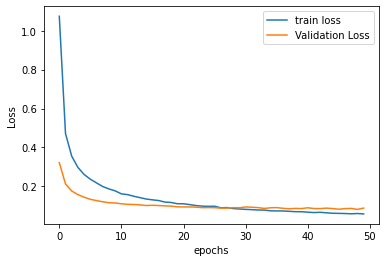

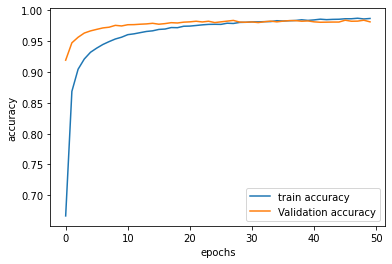

In [21]:
h.history.keys()

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(["train loss", "Validation Loss"])

plt.figure()
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train accuracy", "Validation accuracy"])

# 5- **Evaluate** the model
An important step in deep learning researches

In [7]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 6ms/step - loss: 0.1050 - accuracy: 0.9724


[0.10501750558614731, 0.9724000096321106]

## 5-1 Make **predictions**

In [ ]:
y_hat = model.predict(X_test[0:1, :, :])

1/1 [==============================] - 0s 45ms/step


Text(0.5, 1.0, 'Ground truth = 7 Predicted Value =[7]')

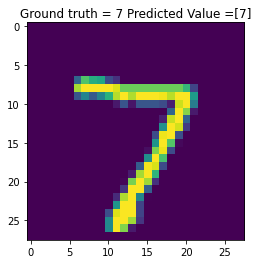

In [ ]:
y_hat_label = np.argmax(y_hat,axis=1)


plt.imshow(X_test[0])
plt.title("Ground truth = " + str(y_test[0]) + " Predicted Value =" + str(y_hat_label))


## 5-2 Use sklearn.metrics for evaluation
    - plot confusion matrix
    - use classification report

In [ ]:
from sklearn

## 5-3 Visualize some results